# Visualisation in Python

The main library we will be using here is **matplotlib**. The matplotlib library is based on a mathematical and graphing programming language called *matplot*. The matplotlib library needs to be installed on your machine before it is available for import.

```bash
> pip install matplotlib
```

Notice that we're not importing the matplotlib package directly but we're importing the pyplot module. This package has been designed to fit the syntax of python and is what pretty much every Python programmer uses. Also, we usually import this module as **plt**. This is a widespread convention, it just allows us to refer to module as *plt* rather than *pyplot* 

We saw the **numpy** and **pandas** packages last week, these should already be installed on your machine. Matplotlib works with numpy arrays, so we almost always want to import numpy along with matplotlib.

The **requests** module allows us to download files over the internet. We'll be downloading a dataset in this script. You can install the requests package using

```bash
> pip install requests
```

Finally, we're importing the **os** package. This stands for *operating system*. It allows us to work with files on disk (among other things). It's installed as part of Python by default so no need for pip, but you still need to import it to use it in your scripts.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## A First Look at MatPlotLib

There are two ways of using *MatPlotLib*, the object oriented method (object-oriented graphs, *yuck*), and the python method. If you're interested in the object-oriented method, check out the [matplotlib docs](https://matplotlib.org/tutorials/introductory/usage.html#the-object-oriented-interface-and-the-pyplot-interface)

We talked about *geoms* in R. A *geom* was essentially the graph type (line, scatter *etc.*). Matplotlib doesn't really have a concept of *geoms* as such, but we can build the different types of graph using markers, line-styles *etc.*

What is the default graph type for matplotlib? Try it out below, by plotting the x and y data without specifying any options

In [2]:
x = np.array([1, 2, 4, 5, 7])
y = np.array([3, 5, 1, 1, 0])


Let's say we want a scatterplot instead. We can set the optional parameters *marker* and *linestyle* to change the lines to dots. A *marker* value of *o* represents circles; *linestyle* lets us specify solid or dashed lines etc., but a value of *none* (as a string) tells matplotlib not to use lines at all. Obviously enough, the *color* parameter changes the colour of the markers

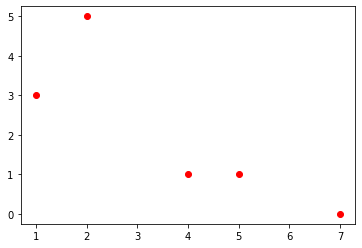

In [3]:
plt.plot(x, y, marker='o', linestyle='none', color='red')
plt.show()

### Task 1

You can get more information on all of the many parameters available at the [documentation for the plot function](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot). I highly recommend scanning through this and referring back when needed.

Have a look at the function signature on the docs page above. The third optional parameter is *fmt*. This is a special format string that can be used as a shortcut allowing you to specify multiple parameters in one go. Have a look at the notes on the format string and see if you can use it to create a plot with downward facing triangles connected by a dashed line instead of red dots.

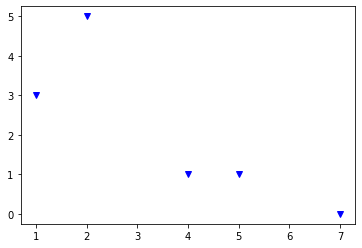

In [4]:
plt.plot(x, y, marker='v', linestyle='none', color='blue')
plt.show()

## Multiple Series on a Single Plot

This is the equivalent to R's multiple geoms. We can overlay plots on one another simply by calling the plt.plot() function over and over. Our first call to plt.plot() will create a new *Axes* for us. Every plot will be created on top of that axes until we call plt.show(). The show() function will output the current plot and reset the axes.

### Task 2

1. Create 20 numbers evenly spaced between 0 and 3
2. Plot the function y=x using blue stars connected by a solid line (i.e. if x=1, y=1, x=2, y=2 etc.)
3. Plot the function y=x squared using yellow upward facing triangles connected by a dashed line
4. Plot the function y=x cubed using green pentagrams connected by a dotted line
5. Ensure all of the above series are plotted on the same Axes

In the example below we're overlaying three series of data on top of one another. Modify the code below to output three separate figures, one for each plot.

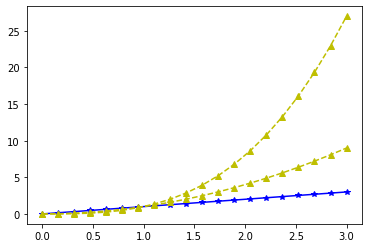

In [9]:
x = np.linspace(0, 3, num=20)
y = x

plt.plot(x,y, '*-b')
plt.plot(x,y**2, '^--y')
plt.plot(x,y**3, '^--y')
plt.show()

## Exploring Different Chart Types

We saw how we can tweak the parameters of the plot() function to turn a line chart into a scatterplot. We can also use some of the convenience functions provided by matplotlib to do this for us. It's a bit easier, and definitely more readable to use these where appropriate. In this section we'll look at some of the different types of charts that are available to us

### Scatter

Look up the [documentation on scatter()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter) to see how we can use the scatter plot function to create a scatter plot with red stars as markers.

The example below uses numpy to generate 5 random values for x and 5 random values for y. The call to RandomState sets a seed which ensures that the same values will be produced by the random number generator every time the script is run

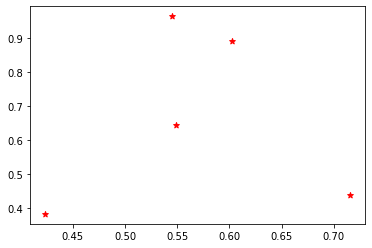

In [8]:
# create a random number generator seeded with the value 0
rng = np.random.RandomState(0)

x = rng.rand(5)
y = rng.rand(5)

plt.scatter(x, y, marker='*', c='red')

### Histograms

A histograms are useful to count the number of values that fall within a certain range. Unlike scatterplots and line charts they don't take a y value. We supply the x values and the y values is the count of values falling into each bin. See week 4 for more detail on histograms.

Check out the [hist() documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist) for a full reference of how to use the *hist()* function. Create a histogram using the data below. Try to bin the values so that the bell curve associated with normal distributions is visible

In this example we're using the numpy random.normal() function to draw 1000 random numbers normally distributed around a mean of 50 with a standard deviation of 10. This should give us a roughly bell-shaped curve (because the values are randomly distributed though, it won't be perfectly symmetrical). 

(array([  1.,   7.,  46., 132., 267., 244., 200.,  76.,  20.,   7.]),
 array([12.9311794 , 20.06250266, 27.19382593, 34.3251492 , 41.45647247,
        48.58779574, 55.719119  , 62.85044227, 69.98176554, 77.11308881,
        84.24441208]),
 <BarContainer object of 10 artists>)

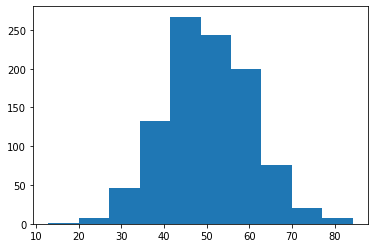

In [12]:
np.random.RandomState(0)
x = np.random.normal(50, 10, 1000)
counts, bins = np.histogram(x)
plt.hist(bins[:-1], bins, weights=counts)


### Boxplots

We saw how boxplots can be used to visualise multiple distributions and they pack in quite a lot of information such as the mean, interquartile range, outliers, etc. As you may have guessed at this stage, matplotlib uses the **boxplot()** function to create boxplots. As with histograms, boxplots only take *x* values while the *y* values represent the distribution of x. Unlike histograms, boxplots can take make multiple series of x values. Remember in R that we usually used boxplots to visualise the distribution of a continuous variable with respect to a categorical variable

We're creating our data below using a random number generator. The random() functin returns a value between 0 and 1 so we multiply this by 100 to scale it. In order to pass multiple x values to the boxplot() function we use a python list. Create a boxplot using the x values below

{'whiskers': [<matplotlib.lines.Line2D at 0x7f39c8d11f40>,
 'caps': [<matplotlib.lines.Line2D at 0x7f39c8d7ca60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f39c8d11d30>,
 'medians': [<matplotlib.lines.Line2D at 0x7f39c8d7c400>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f39c8d7cca0>,
 'means': []}

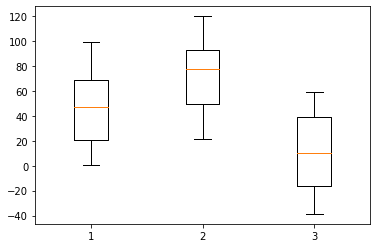

In [14]:
rng = np.random.RandomState(0)

x1 = np.array(rng.random(100) * 100)
x2 = np.array(rng.random(100) * 100 + 20)
x3 = np.array(rng.random(100) * 100 - 40)

data = [x1, x2, x3]
plt.boxplot(data)

Our first step is to download the dataset. We don't want to do this every time we run the script. If we've already download the file there's no need to get it again. We can see how we use the os package to check if a file exists. We only download the dataset if the file isn't found.

Notice the second parameter to **open()** in the download_data function. This second parameter allows us to specify a string representing our file-opening options. We can either open a file for reading (r), (over-)writing (w) or appending (a). The second character **b**, tells Python that we're going to give it binary content (rather than Python strings). When we get web page using the requests module, its content is in binary format. If we forget to supply this parameter we'll get an error when we try to write the file.

## Subplots

We saw how we can use *faceting* in R to create *small multiples* of graphs. Though not as straightforward as R, matplotlib allows us to achieve the same thing using the **subplot()** function. The subplot function takes three parameters. The number of rows, the number of columns, and the index of the current plot. Note that the index for subplot is *1-based*, not 0-based.

The code below contains 4 sets of x/y values. Plot each of those pairs in a 2x2 grid below. The top left plot should be red, the top right should be green, the bottom left should be blue and the bottom right should be yellow

The **subplot()** function allows you to specify these three values as a single number in what, to me, seems like a pretty unnecessary and massively confusing "*feature*". So if you see code that looks like

```python
plt.subplot(612)
```

this is just shorthand for

```python
plt.subplot(6, 1, 2)
```

Of course, this only works if none of the numbers are greater than 9, and make it building sub-plots in loops unnecessarily complicated. My advice to you is to avoid it like the plague and shun anyone you catch using this ridiculous format.

It saves you two commas for crying out loud...

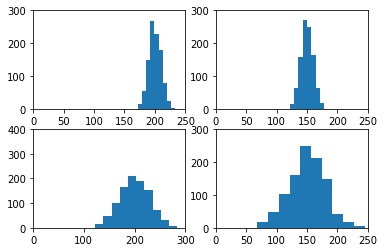

In [3]:
np.random.RandomState(0)

standard_deviation = [10, 30]
mean_value = [200, 150]

x1 = np.random.normal(mean_value[0], standard_deviation[0], 1000)
x2 = np.random.normal(mean_value[1], standard_deviation[0], 1000)
x3 = np.random.normal(mean_value[0], standard_deviation[1], 1000)
x4 = np.random.normal(mean_value[1], standard_deviation[1], 1000)


plt.subplot(2, 2, 1)
plt.xlim(0, 250)
plt.ylim(0, 300)
plt.hist(x1)
plt.subplot(2, 2, 2)
plt.xlim(0, 250)
plt.ylim(0, 300)
plt.hist(x2)
plt.subplot(2, 2, 3)
plt.xlim(0, 300)
plt.ylim(0, 400)
plt.hist(x3)
plt.subplot(2, 2, 4)
plt.xlim(0, 250)
plt.ylim(0, 300)
plt.hist(x4)
plt.show()

## Bar charts

A bar chart plots numeric values for levels of a categorical feature as bars. It is used when you want to show a distribution of data points or perform a comparison of metric values across different subgroups of your data. You can see the documentation for barcharts using `matplotlib` [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html). 

To exemplify its use we are using some hardcoded data from 2016 Olympics built in a Pandas dataframe. Run the cell below and observe the result. Comment some of the `ax.bar` to understand their effect.

/tmp/ipykernel_12393/3121219492.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.index, rotation="90")


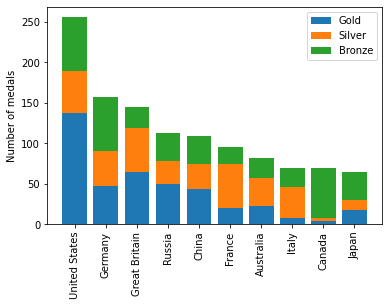

In [4]:
medals = {"Gold":[137,47,64,50,44,20,23,8,4,17],
          "Silver":[52,43,55,28,30,55,34,38,4,13],
          "Bronze":[67,67,26,35,35,21,25,24,61,34]}
index = ["United States", "Germany", "Great Britain", "Russia", "China", "France", "Australia", "Italy", "Canada", "Japan"]


df = pd.DataFrame(medals, index = index)

fig, ax = plt.subplots()
ax.bar(df.index, df["Gold"], label="Gold")
ax.bar(df.index, df["Silver"], bottom=df["Gold"], label="Silver")
ax.bar(df.index, df["Bronze"], bottom=df["Gold"] + df["Silver"], label="Bronze")
ax.set_xticklabels(df.index, rotation="90")
ax.set_ylabel("Number of medals")
ax.legend()
plt.show()

### Task 3

1. The code below gives you an array of 4 sets of x values and an array of 4 sets of y values
2. Plot each pair of x y values in a 2 x 2 grid using matplotlib
3. Use the colors red, green, blue and yellow for each plot respectively
4. Advanced: Do this using a loop


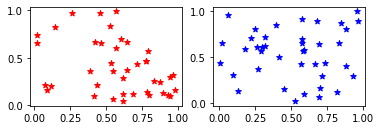

In [14]:
rng = np.random.RandomState(0)

x1 = [rng.random(10) for i in range(4)]
y1 = [rng.random(10) for i in range(4)]

x2 = [rng.random(10) for i in range(4)]
y2 = [rng.random(10) for i in range(4)]

plt.subplot(2, 2, 1)
plt.scatter(x1, y1, marker='*', c='red')
plt.subplot(2, 2, 2)
plt.scatter(x2, y2, marker='*', c='blue')


## Figure Elements

There's much more to a plot than just the data points. Good plots should be labelled so that they're easy to read. Very good plots will make sure that the x-axis and y-axis are correctly calibrated, and will make use of tools like legends to explain what's going on in the plot. These elements can be added and modified using matplotlib function calls. I'll cover some of the functions here, as always, the exhaustive list can be found in the [matplotlib pyplot documentation](https://matplotlib.org/3.1.0/api/pyplot_summary.html).

### Labels

X and Y labels are indications of what each axis on the plot refers to. X and Y labels should give an indication of the what variable is being plotted, as well as the units (where it's not immediately obvious). A plot should also have a title, which describes what's being shown 

Text(0.5, 1.0, 'Distribution of Income by Age among Irish residents')

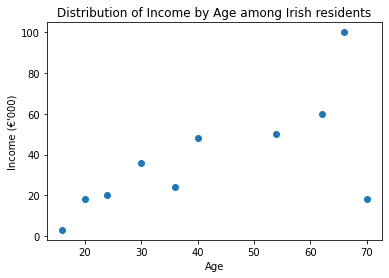

In [7]:
age = np.array([16, 20, 24, 30, 36, 40, 54, 62, 66, 70])
income = np.array([3, 18, 20, 36, 24, 48, 50, 60, 100, 18])

plt.scatter(age, income)
plt.xlabel("Age")
plt.ylabel("Income (€'000)")
plt.title("Distribution of Income by Age among Irish residents")

### Legends

Whenever we encode information using something like shapes, colours *etc.*, we need to include a legend to explain how that encoding works. 

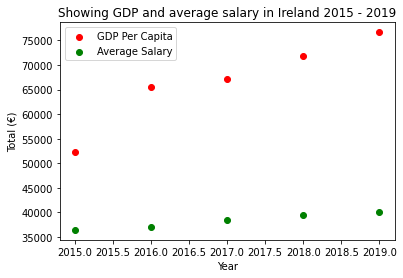

In [15]:
# https://tradingeconomics.com/ireland/wages

ireland_gdp_per_capita = np.array([52274.5, 65432.7, 67077.7, 71756, 76662.7])
ireland_average_salary = np.array([701, 711, 739, 759, 770]) * 52
years = np.array([2015, 2016, 2017, 2018, 2019])

plt.scatter(years, ireland_gdp_per_capita, c='red', label="GDP Per Capita")
plt.scatter(years, ireland_average_salary, c='green', label="Average Salary")
plt.title("Showing GDP and average salary in Ireland 2015 - 2019")
plt.xlabel("Year")
plt.ylabel("Total (€)")
plt.legend()
plt.show()

## Axis Calibration

The example above is OK, but our year axis looks kind of odd. It's strange to see the year 2017.5. Also, matplotlib has automatically set the limits of the y axis to just below the minimum value supplied and just above the maximum. It might make more sense to start the graph at 0 to give an idea of scale.

The **xticks()** function allows us to set the locations of the *ticks* or minor lines along the x axis. See [the documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xticks.html#matplotlib.pyplot.xticks) for more details.

The **xlim()** and **ylim()** functions allow us to set the minimum and maximum values of the x and y axis. Matplotlib will do a best-guess attempt at this, but it's often sub-optimal.

Finally, the legend looks a little cramped in the top left of the graph, so we'll use the *loc* (location) parameter to put it in the bottom right

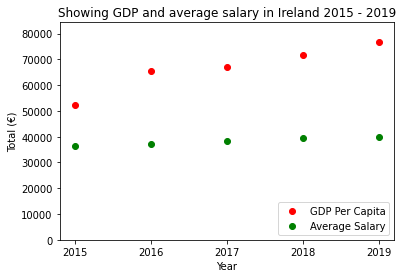

In [10]:
plt.scatter(years, ireland_gdp_per_capita, c='red', label="GDP Per Capita")
plt.scatter(years, ireland_average_salaray, c='green', label="Average Salary")
plt.title("Showing GDP and average salary in Ireland 2015 - 2019")
plt.xlabel("Year")
plt.ylabel("Total (€)")
plt.legend(loc="lower right")

plt.xticks(years) # we don't want matplotlib to automatically insert minor ticks between the years
plt.ylim(0, ireland_gdp_per_capita.max() + ireland_gdp_per_capita.max() * 0.1)
plt.show()

## Matplotlib and Pandas

Pandas is the most common library used for working with dataframes and it's tightly integrated with matplotlib. There are two ways you can use matplotlib with pandas. One way is to use the functions we've looked at so far, and pass the column values from our dataframe. However, pandas dataframes have some convenience functions that let you create a graph directly from the dataframe itself. We'll explore this below.

For this next section we'll be using the iris dataset. The cell below will download the Iris dataset from the internet and save it in the current working directory. We can then use the pandas read_csv() funciton to create a dataframe.

In [15]:
import pandas as pd
import requests 
import os
import matplotlib.pyplot as plt

def download_data():
    url = "https://bit.ly/2HIdnEP"
    r = requests.get(url)
    
    # the second parameter to the open() function allows to specify file options
    # the 'w' option says that we're opening this file for writing
    # the b option says that we're writing binary data (rather than a string)
    with open('./iris.csv', 'wb') as f:
        f.write(r.content)

# we only want to download the file if it doesn't already exist
if not os.path.exists('./iris.csv'):
    download_data()
    
df = pd.read_csv('./iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


We mentioned earlier that matplotlib works with numpy arrays. Pandas columns are similar to numpy arrays but not quite the same. You might get away with passing a pandas column directly, but you're better to get into the habit of converting the column to a true numpy array. This will help avoid nasty bugs in the future. A pandas column has a **.values** property which returns the column as a numpy array.

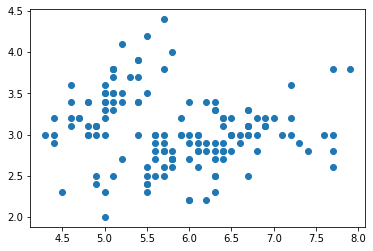

In [12]:
plt.scatter(df.sepal_length.values, df.sepal_width.values)

This approach lets us create visualisations using raw numpy arrays. However, pandas is tightly integrated with matplotlib and we can make use of the built-in functions on the dataframe to make it a little easier to create plots. Here's another way of writing the same code

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

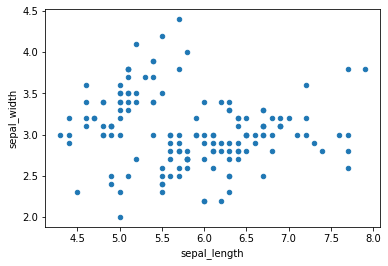

In [13]:
df.plot.scatter(x='sepal_length', y='sepal_width')

## Task 4
When we use the pandas version we need to pass x and y as **named parameters**. The **c** parameter allows us to control the colour of our markers. In R we could give ggplot a categorical column and it would automatically pick a colour-palette for us. Unfortunately, with pandas/matplotlib we need to make sure the column we specify contains valid colour values. We can, however, use the techniques we picked up last week to add a column and set the colour based on the value of the species column. 

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

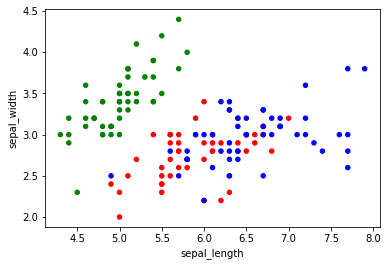

In [12]:
df['color'] = 'undefined'
df.loc[df.species == 'setosa', 'color'] = 'green'
df.loc[df.species == 'versicolor', 'color'] = 'red'
df.loc[df.species == 'virginica', 'color'] = 'blue'
df.plot.scatter(x='sepal_length', y='sepal_width', c="color")

## Creating boxplots with the Pandas dataframe

Pandas has wrapper functions for pretty much all of the matplotlib plot types. You can check out the full list at the [pandas DataFrame documentation](https://pandas.pydata.org/docs/reference/frame.html) All of these functions are in the **plot** namespace i.e. DataFrame.plot.scatter(), DataFrame.plot.box() *etc.*.

By default, the **plot.box()** or **boxplot()** function will plot each numerical column in the dataframe.

<AxesSubplot:>

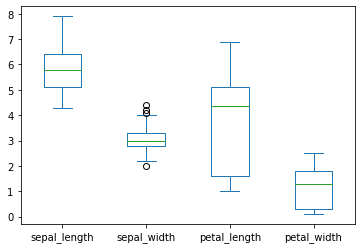

In [13]:
df.plot.box()

The pandas plotting functions are quick and easy-to-use. They're most useful when you're doing some initial exploration. However, this ease-of-use comes at a cost. Because they simplify the interface, you often don't have the same level of control over the plots, so if you're trying to create stunning visualisations, you're probably better off using matplotlib directly. 

## Changing styles

Try the styles below and see how they look. Check the style sheet reference [here](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html) and some other different styles.

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

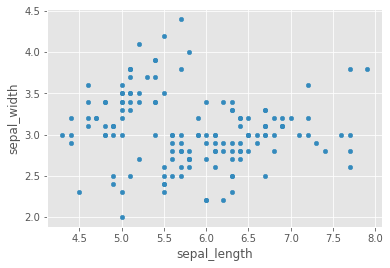

In [16]:
plt.style.use("ggplot")
df.plot.scatter(x='sepal_length', y='sepal_width')

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

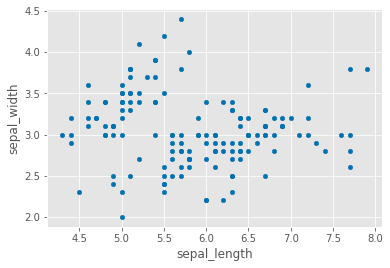

In [17]:
plt.style.use("seaborn-colorblind")
df.plot.scatter(x='sepal_length', y='sepal_width')

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

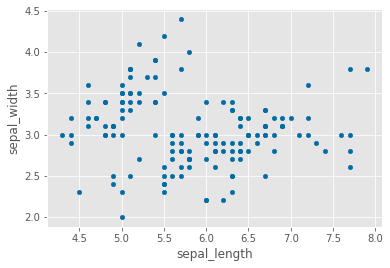

In [16]:
plt.style.use("tableau-colorblind10")
df.plot.scatter(x='sepal_length', y='sepal_width')

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

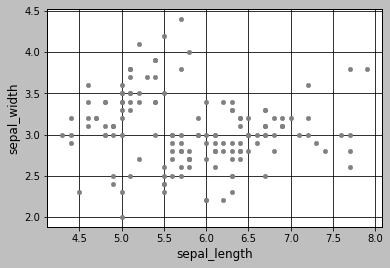

In [17]:
plt.style.use("grayscale")
df.plot.scatter(x='sepal_length', y='sepal_width')

## Saving to external files

We can easily save graphs to external files using the `fig.savefig` method. Below you can see some examples how to save a graph in `png`, `jpg` and `svg` (good to edit in other graphic software). You can set the quality using the `quality` parameter (value between 1 and 100). You can also set the `dpi` (dots per inch). The higher the `dpi` the larger the resolution (i.e. you can zoom more on it without blurring the image) but the bigger the file will be. 300 is usually a good `dpi` for scientific papers.

Finally to set the size of the figure you can use the `fig.set_size_inches(w, h)` passing the width and heigth. 

/tmp/ipykernel_12788/919532192.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.index, rotation="90")
/tmp/ipykernel_12788/919532192.py:24: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig.savefig("medals_100.jpg", quality=1)


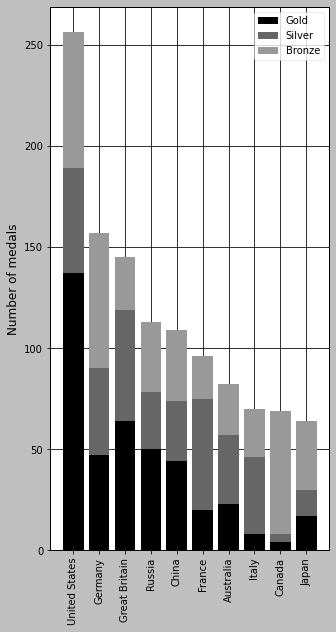

In [18]:
medals = {"Gold":[137,47,64,50,44,20,23,8,4,17],
          "Silver":[52,43,55,28,30,55,34,38,4,13],
          "Bronze":[67,67,26,35,35,21,25,24,61,34]}
index = ["United States", "Germany", "Great Britain", "Russia", "China", "France", "Australia", "Italy", "Canada", "Japan"]

df = pd.DataFrame(medals, index = index)

plt.style.use("grayscale")
fig, ax = plt.subplots()
ax.bar(df.index, df["Gold"], label="Gold")
ax.bar(df.index, df["Silver"], bottom=df["Gold"], label="Silver")
ax.bar(df.index, df["Bronze"], bottom=df["Gold"] + df["Silver"], label="Bronze")
ax.set_xticklabels(df.index, rotation="90")
ax.set_ylabel("Number of medals")
ax.legend()

# Save fig as png
fig.savefig("medals.png")

# Save fig as jpg
fig.savefig("medals.jpg")

# Save fig as jpg with higher quality
fig.savefig("medals_100.jpg", quality=1)

# Save fig as svg
fig.savefig("medals_100.svg")

# Save fig as jpg with different size
fig.set_size_inches(5,10)
fig.savefig("medals_300dpi.jpg", dpi=300) #used if you want to have it in a paper they may ask as spec